In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
# import seaborn as sns
import matplotlib.ticker as ticker 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/tweets.csv")

In [ ]:
df['NewDateFormat'] = pd.to_datetime(df['tweet_creation'], unit='s')

In [ ]:
df = df[(df['tweet_creation']>1483228799) & (df['tweet_creation']<=1514764799)]

In [ ]:
# df['month'] = df['NewDateFormat'].dt.month
# df['NewDateFormat'].astype(str)

In [ ]:
# df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").strftime("%m"))

In [ ]:
def categorize_tweets(group):
    if (group['qt_flag'] == False).all() and (group['rt_flag'] == False).all():
        return 'o'
    elif (group['qt_flag'] == False).all() and (group['rt_flag'] == True).all():
        return 'r'
    elif (group['qt_flag'] == True).all() and (group['rt_flag'] == False).all():
        return 'q'
    elif ((group['qt_flag'] == False) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_r'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == False)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_q'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'q_r'
    else:
        return 'o_q_r'

In [ ]:
groupDf = df[['user_id',  'qt_flag', 'rt_flag','month']]

In [ ]:
totalDf = groupDf.groupby('user_id').apply(categorize_tweets)
value_counts = totalDf.value_counts().to_dict()
values = list(value_counts.values())
# print(values)

In [ ]:
value_counts

{'o_r': 57987, 'o': 1433, 'o_q': 810, 'r': 90, 'o_q_r': 35, 'q': 2}

In [ ]:
unique_values = df['month'].unique()
unique_values.sort()

In [ ]:
unique_values

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10'],
      dtype=object)

In [ ]:
arr_o = []
arr_r = []
arr_q = []
arr_o_q = []
arr_o_r = []
arr_o_q_r = []

In [ ]:
def countUserCategories(monthIn):
  monthDf = groupDf[groupDf['month'] == monthIn]
  userDf = monthDf.groupby('user_id').apply(categorize_tweets)
  value_counts = userDf.value_counts().to_dict()
  values = list(value_counts.values())
  arr_o_r.append(values[0])
  arr_o.append(values[1])
  arr_o_q.append(values[2])
  arr_r.append(values[3])
  arr_o_q_r.append(values[4])
  arr_q.append(values[5])

  return (arr_o_r, arr_o, arr_o_q, arr_r, arr_o_q_r, arr_q)


In [ ]:
for i in unique_values:
  countUserCategories(i)

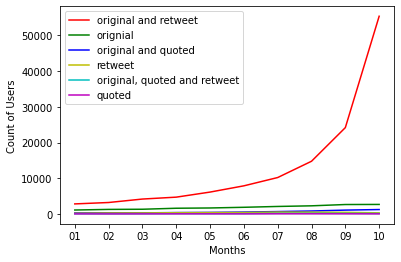

In [ ]:
# x = range(len(unique_values))
x = unique_values
plt.plot(x, arr_o_r, 'r', label='original and retweet')
plt.plot(x, arr_o, 'g', label='orignial')
plt.plot(x, arr_o_q, 'b', label='original and quoted')
plt.plot(x, arr_r, 'y', label='retweet')
plt.plot(x, arr_o_q_r, 'c', label='original, quoted and retweet')
plt.plot(x, arr_q, 'm', label='quoted')
plt.xticks(x, unique_values)
plt.xlabel('Months')
plt.ylabel('Count of Users')
plt.legend(loc='upper left')
plt.show()

In [ ]:
print(arr_o_r)
print(arr_o)
print(arr_o_q)
print(arr_r)
print(arr_o_q_r)
print(arr_q)

[2820, 3213, 4180, 4713, 6133, 7883, 10205, 14765, 24181, 55363]
[1110, 1281, 1326, 1606, 1682, 1874, 2107, 2285, 2648, 2672]
[298, 330, 317, 390, 440, 536, 678, 832, 1084, 1243]
[197, 267, 287, 362, 389, 410, 528, 501, 458, 319]
[69, 64, 73, 95, 84, 100, 161, 171, 155, 131]
[27, 18, 28, 41, 42, 34, 54, 51, 47, 33]


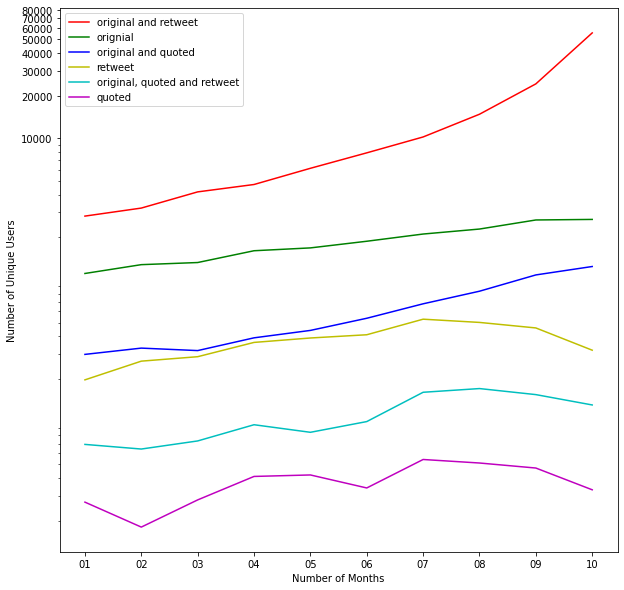

In [ ]:
# x = range(len(unique_values))
x = unique_values
plt.figure(figsize=(10,10))
plt.semilogy(x, arr_o_r, 'r', label='original and retweet')
plt.semilogy(x, arr_o, 'g', label='orignial')
plt.semilogy(x, arr_o_q, 'b', label='original and quoted')
plt.semilogy(x, arr_r, 'y', label='retweet')
plt.semilogy(x, arr_o_q_r, 'c', label='original, quoted and retweet')
plt.semilogy(x, arr_q, 'm', label='quoted')

plt.xticks(x, unique_values)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
# plt.gca().yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
# plt.gca().yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(2,10)/10, numticks=15))
# plt.gca().yaxis.set_tick_params(which='both', right=True)
# plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

plt.xlabel('Number of Months')
plt.ylabel('Number of Unique Users')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# monthDf = groupDf[groupDf['month'] == "01"]
# len(monthDf['user_id'].unique())
# userDf = groupDf.groupby('user_id').apply(categorize_tweets)
# value_counts = userDf.value_counts().to_dict()
# values = list(value_counts.values())